# Linear Regression Assignment - 24/02/2019 

## Car Price Prediction Case Study
### Problem Statement:
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

1)	Which variables are significant in predicting the price of a car

2)	How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market

In [380]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [381]:
pd.options.display.max_columns=None

In [382]:
#For Feature scaling
from sklearn.preprocessing import MinMaxScaler
#For spliting data into traning set and test set 
from sklearn.model_selection import train_test_split
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Linear regression model from statsmodel
import statsmodels.api as sm
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

### Step 1: Reading and Understanding the Data

In [383]:
car_master_df = pd.read_csv('CarPrice_Assignment.csv')

In [384]:
car_master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [385]:
car_master_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [386]:
# Split the 'CarName' column to get the name of the car company and create a new column 'compname'
car_master_df['compname']=car_master_df['CarName'].str.split(' ').str[0]

In [387]:
car_master_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,compname
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [388]:
#Independent variables:
#Categorical : Symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype, cylindernumber, fuelsystem
#Numeric : wheelbase,carlength, carwidth, carheight, curbweight, enginesize, boreratio,stroke,compressionratio,horsepower,peakrpm,citympg, highwaympg, 

#Dependent variable: 
#Numeric: price

### Step 2: Visualising the Data

#### Visualising Numeric Variables

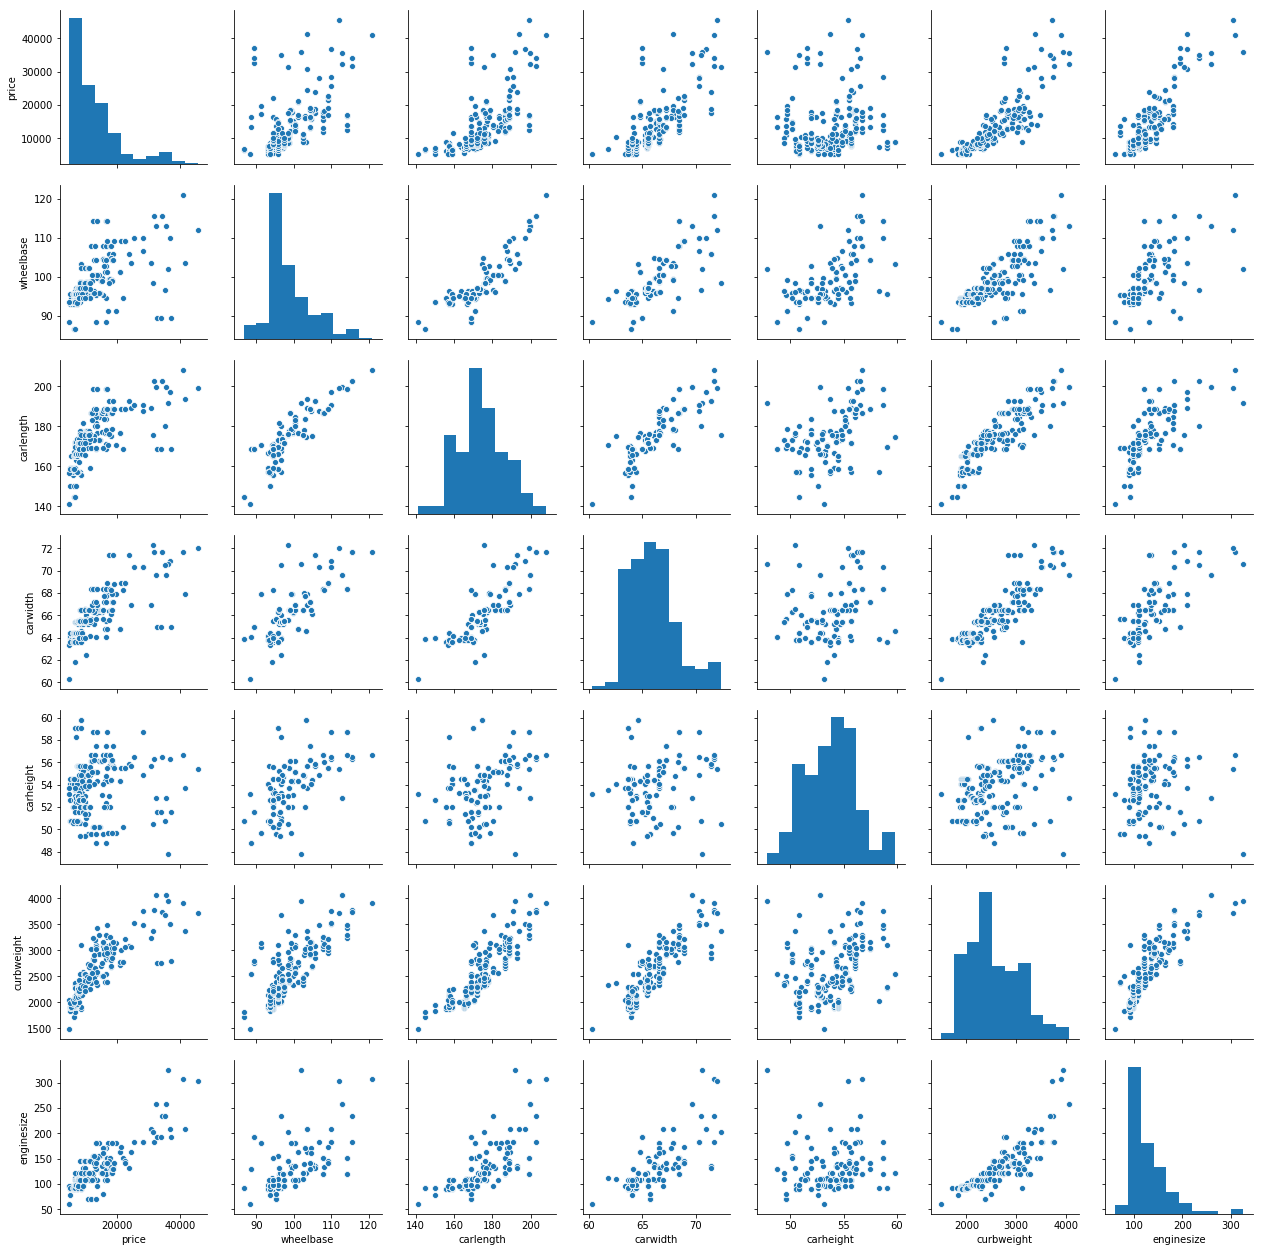

In [389]:
sns.pairplot(data = car_master_df, vars=['price', 'wheelbase','carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize'] )

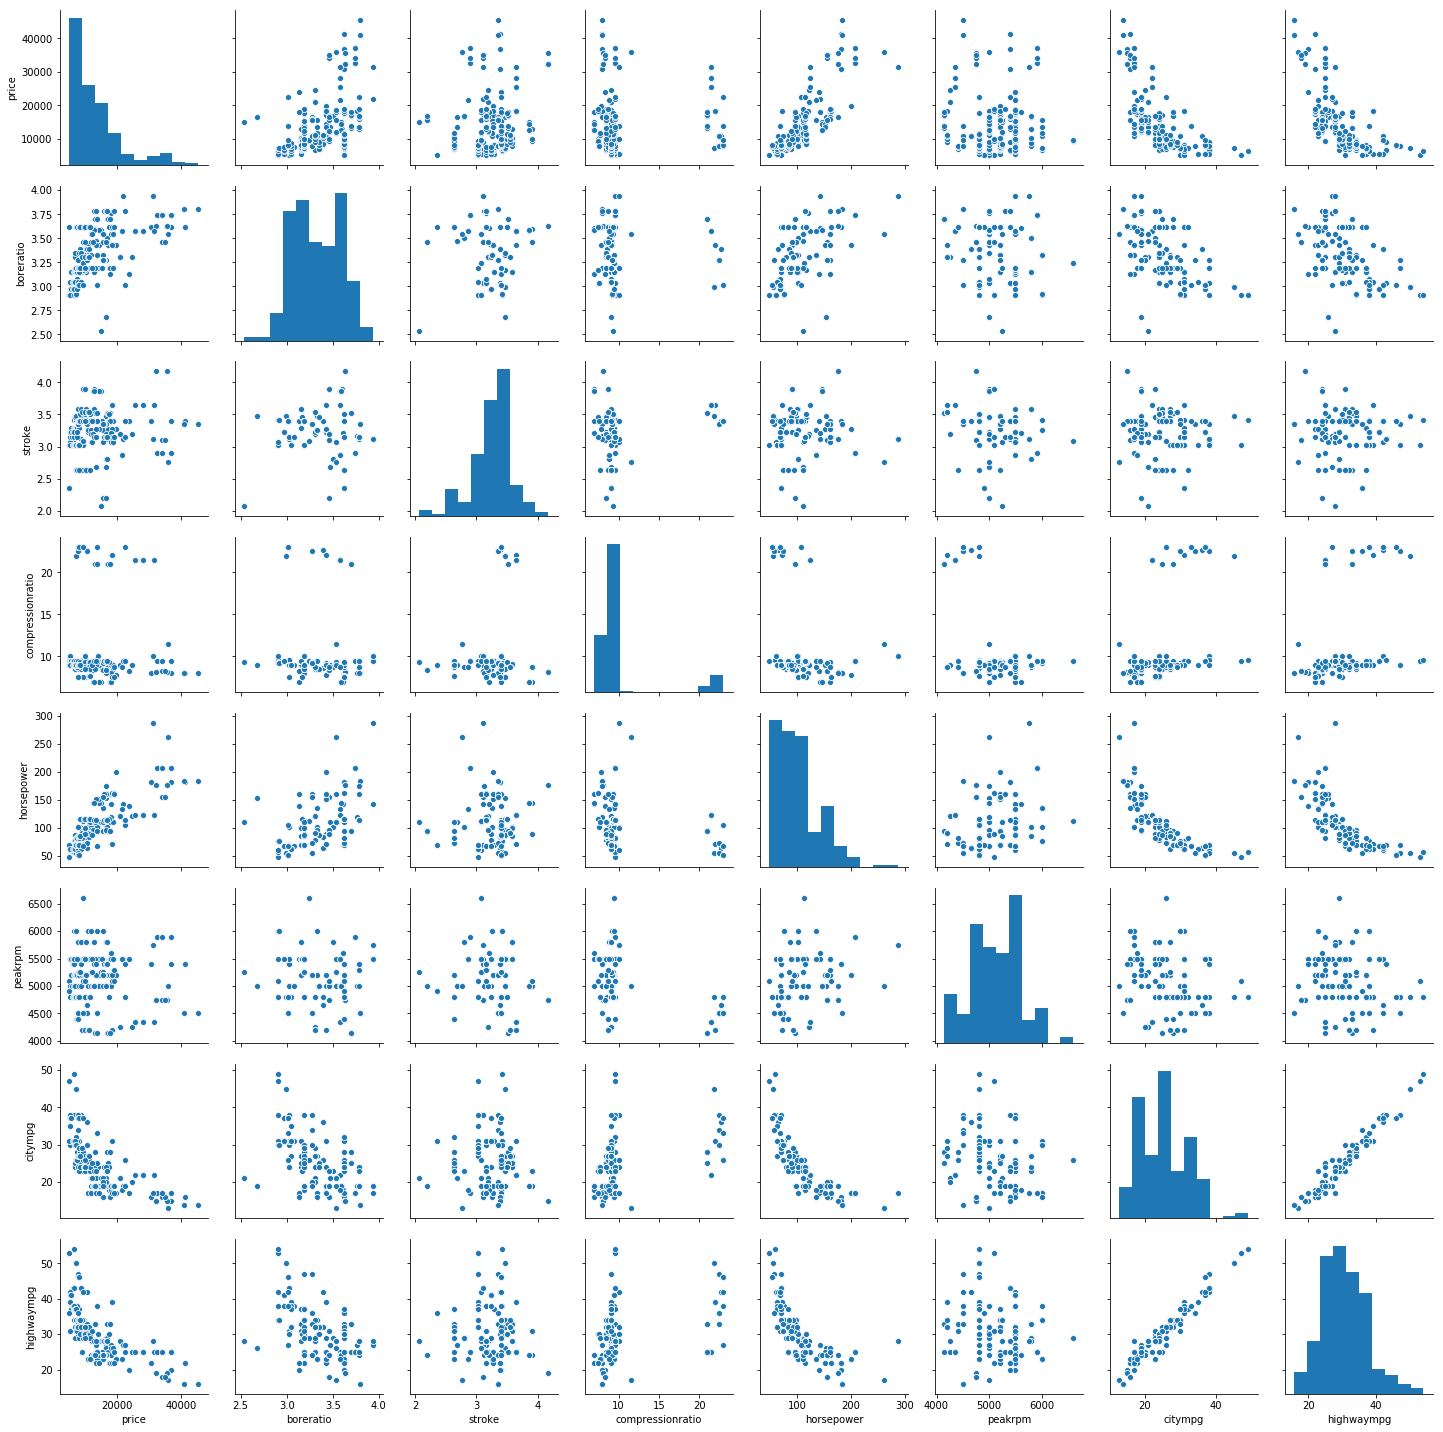

In [390]:
sns.pairplot(data = car_master_df, vars=['price', 'boreratio','stroke','compressionratio','horsepower','peakrpm','citympg', 'highwaympg'] )

#### Visualising Categorical Variables

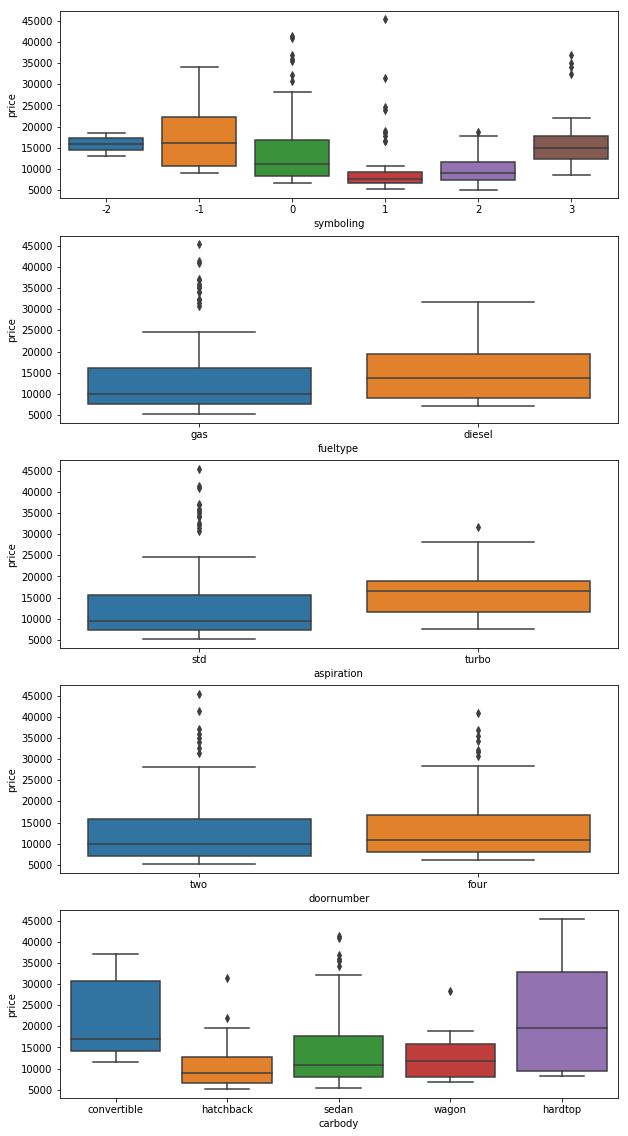

In [391]:
#symboling,fueltype,aspiration,doornumber,carbody
plt.figure(figsize=(10, 20))
plt.subplot(5,1,1)
sns.boxplot(x = 'symboling', y = 'price', data = car_master_df)
plt.subplot(5,1,2)
sns.boxplot(x = 'fueltype', y = 'price', data = car_master_df)
plt.subplot(5,1,3)
sns.boxplot(x = 'aspiration', y = 'price', data = car_master_df)
plt.subplot(5,1,4)
sns.boxplot(x = 'doornumber', y = 'price', data = car_master_df)
plt.subplot(5,1,5)
sns.boxplot(x = 'carbody', y = 'price', data = car_master_df)

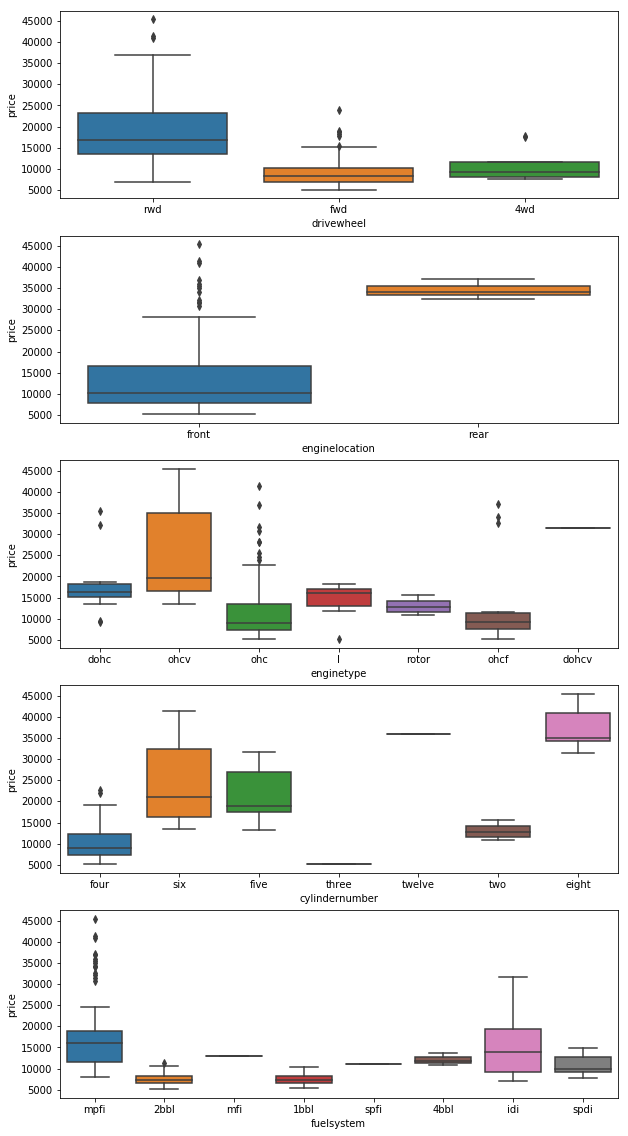

In [392]:
#drivewheel,enginelocation,enginetype, cylindernumber, fuelsystem
plt.figure(figsize=(10, 20))
plt.subplot(5,1,1)
sns.boxplot(x = 'drivewheel', y = 'price', data = car_master_df)
plt.subplot(5,1,2)
sns.boxplot(x = 'enginelocation', y = 'price', data = car_master_df)
plt.subplot(5,1,3)
sns.boxplot(x = 'enginetype', y = 'price', data = car_master_df)
plt.subplot(5,1,4)
sns.boxplot(x = 'cylindernumber', y = 'price', data = car_master_df)
plt.subplot(5,1,5)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car_master_df)

### Step 3: Data Preparation

#### Converting categorical data (2 levels)

In [393]:
def categoricalToNum(x,var1):
    #result=0
    #print('value-->',x,'var1->',var1)
    if var1 == 1:
        return x.map({'diesel':0,'gas':1})        
    elif var1 == 2:        
        return x.map({'std' : 0, 'turbo': 1})
    elif var1 == 3:
        return x.map({'two': 0, 'four' : 1})
    elif var1 == 4:
        return x.map({'front': 0, 'rear' : 1})
    #print ('result-->', result)
    #return result

In [394]:
car_master_df[['fueltype']] = car_master_df[['fueltype']].apply(categoricalToNum, var1=1)

In [395]:
car_master_df[['aspiration']] = car_master_df[['aspiration']].apply(categoricalToNum, var1=2)

In [396]:
car_master_df[['doornumber']] = car_master_df[['doornumber']].apply(categoricalToNum, var1=3)

In [397]:
car_master_df[['enginelocation']] = car_master_df[['enginelocation']].apply(categoricalToNum, var1=4)

#### Converting values in 'cylindernumber' to numeric

In [398]:
cylinderNumDict={"one":1,"two":2,"three":3,"four":4,"five":5,"six":6,"seven":7,"eight":8,"nine":9,"zero":0,"eleven":11,"twelve":12}
car_master_df['cylindernumber'] = car_master_df['cylindernumber'].str.lower().replace(cylinderNumDict)

In [399]:
car_master_df['cylindernumber'] = pd.to_numeric(car_master_df['cylindernumber'])

#### Converting categorical data (n levels)

In [400]:
multiCatFeatures = ['carbody','drivewheel','enginetype','fuelsystem']
car_master_df = pd.get_dummies(columns=multiCatFeatures, data=car_master_df, drop_first=True)

In [401]:
car_master_df.head(15)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,compname,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,alfa-romero giulia,1,0,0,0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.000,alfa-romero,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,3,alfa-romero stelvio,1,0,0,0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.000,alfa-romero,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,1,alfa-romero Quadrifoglio,1,0,0,0,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.000,alfa-romero,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
3,4,2,audi 100 ls,1,0,1,0,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.000,audi,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,5,2,audi 100ls,1,0,1,0,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.000,audi,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
5,6,2,audi fox,1,0,0,0,99.8,177.3,66.3,53.1,2507,5,136,3.19,3.40,8.5,110,5500,19,25,15250.000,audi,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
6,7,1,audi 100ls,1,0,1,0,105.8,192.7,71.4,55.7,2844,5,136,3.19,3.40,8.5,110,5500,19,25,17710.000,audi,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
7,8,1,audi 5000,1,0,1,0,105.8,192.7,71.4,55.7,2954,5,136,3.19,3.40,8.5,110,5500,19,25,18920.000,audi,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
8,9,1,audi 4000,1,1,1,0,105.8,192.7,71.4,55.9,3086,5,131,3.13,3.40,8.3,140,5500,17,20,23875.000,audi,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
9,10,0,audi 5000s (diesel),1,1,0,0,99.5,178.2,67.9,52.0,3053,5,131,3.13,3.40,7.0,160,5500,16,22,17859.167,audi,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [402]:
# Creating a working copy
car_working_df = car_master_df

In [403]:
car_working_df = car_working_df.drop(columns=['car_ID', 'CarName'])

In [404]:
car_working_df.shape

(205, 40)

#### Label encoding  -  Company name to encoded values

In [405]:
lb_make = LabelEncoder()

In [406]:
car_working_df ['compname_enc'] = lb_make.fit_transform(car_working_df ['compname'])

In [407]:
car_working_df.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,compname,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,compname_enc
0,3,1,0,0,0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,3,1,0,0,0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,1,1,0,0,0,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
3,2,1,0,1,0,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,2
4,2,1,0,1,0,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,2


In [408]:
car_working_df = car_working_df.drop(columns='compname')

### Step 4: Splitting the Data into Training and Testing Sets

In [409]:
car_working_df.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'compname_enc'],
      dtype='object')

In [410]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
car_working_df_train, car_working_df_test = train_test_split(car_working_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [411]:
car_working_df_train.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,compname_enc
122,1,1,0,1,0,93.7,167.3,63.8,50.8,2191,4,98,2.97,3.23,9.4,68,5500,31,38,7609.0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,16
125,3,1,0,0,0,94.5,168.9,68.3,50.2,2778,4,151,3.94,3.11,9.5,143,5500,19,27,22018.0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,18
166,1,1,0,0,0,94.5,168.7,64.0,52.6,2300,4,98,3.24,3.08,9.4,112,6600,26,29,9538.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,22
1,3,1,0,0,0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
199,-1,1,1,1,0,104.3,188.8,67.2,57.5,3157,4,130,3.62,3.15,7.5,162,5100,17,22,18950.0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,26


#### Feature scaling

In [412]:
car_working_df_train.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,compname_enc
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0,143.000000
mean,0.797203,0.909091,0.181818,0.559441,0.006993,98.523077,173.416783,65.839860,53.551748,2539.510490,4.405594,124.958042,3.307413,3.250070,10.052587,102.552448,5130.069930,25.391608,30.874126,13056.347322,0.020979,0.342657,0.475524,0.132867,0.594406,0.349650,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0,13.979021
std,1.195999,0.288490,0.387050,0.498199,0.083624,5.961835,12.598122,2.214203,2.433766,544.650539,1.158178,40.974034,0.260997,0.312529,3.794890,39.722750,481.273979,6.701939,6.973660,7807.036883,0.143818,0.476266,0.501156,0.340624,0.492733,0.478536,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0,7.464912
min,-2.000000,0.000000,0.000000,0.000000,0.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.680000,2.190000,7.000000,48.000000,4150.000000,13.000000,17.000000,5118.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,94.500000,165.650000,63.950000,51.800000,2121.000000,4.000000,97.000000,3.065000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7554.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,7.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,96.500000,172.000000,65.400000,53.700000,2405.000000,4.000000,110.000000,3.310000,3.270000,9.000000,94.000000,5200.000000,25.000000,31.000000,10198.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,14.000000
75%,1.000000,1.000000,0.000000,1.000000,0.000000,101.200000,182.300000,66.900000,55.350000,2930.500000,4.000000,141.000000,3.540000,3.400000,9.400000,116.000000,5500.000000,31.000000,36.500000,16465.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0,21.000000
max,3.000000,1.000000,1.000000,1.000000,1.000000,115.600000,202.600000,72.300000,59.100000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,41315.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,27.000000


In [413]:
scaler = MinMaxScaler()

In [414]:
feature_scale_list = ['price','peakrpm']
car_working_df_train[feature_scale_list] =  scaler.fit_transform(car_working_df_train[feature_scale_list])
car_working_df_train.head()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,compname_enc
122,1,1,0,1,0,93.7,167.3,63.8,50.8,2191,4,98,2.97,3.23,9.4,68,0.551020,31,38,0.068818,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,16
125,3,1,0,0,0,94.5,168.9,68.3,50.2,2778,4,151,3.94,3.11,9.5,143,0.551020,19,27,0.466890,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,18
166,1,1,0,0,0,94.5,168.7,64.0,52.6,2300,4,98,3.24,3.08,9.4,112,1.000000,26,29,0.122110,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,22
1,3,1,0,0,0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,0.346939,21,27,0.314446,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
199,-1,1,1,1,0,104.3,188.8,67.2,57.5,3157,4,130,3.62,3.15,7.5,162,0.387755,17,22,0.382131,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,26


In [415]:
####car_working_df_train.to_excel('car_training_set.xlsx')

In [416]:
car_working_df_train.corr()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,compname_enc
symboling,1.000000,0.272756,-0.102342,-0.659214,0.155104,-0.539877,-0.390880,-0.263917,-0.557179,-0.268481,-0.179149,-0.182393,-0.132768,-0.028788,-0.266962,0.038395,0.343449,-0.042737,0.022248,-0.129859,0.188676,0.431934,-0.378439,-0.279121,0.122342,-0.072106,0.014279,-0.125030,-0.064765,-0.054312,-0.028385,0.313538,0.001721,0.270560,-0.272756,NaN,0.020993,0.211203,NaN,-0.128262
fueltype,0.272756,1.000000,-0.418546,-0.231626,0.026537,-0.393481,-0.275886,-0.293054,-0.320231,-0.288561,0.005748,-0.145095,-0.153727,-0.265493,-0.983638,0.100280,0.486461,-0.196355,-0.142244,-0.191150,0.046291,0.177060,-0.185979,-0.019545,0.184655,-0.227232,0.026537,-0.318709,-0.004762,0.095709,0.081954,0.053644,0.231869,0.046291,-1.000000,NaN,0.280624,0.066178,NaN,0.002378
aspiration,-0.102342,-0.418546,1.000000,0.089642,-0.039559,0.277414,0.234925,0.307027,0.111052,0.325634,-0.024279,0.115050,0.186639,0.199580,0.307006,0.222900,-0.152424,-0.206821,-0.252367,0.206540,-0.069007,-0.034730,0.059409,0.029136,-0.164489,0.110608,-0.039559,0.251126,-0.031944,-0.011890,-0.047510,-0.079968,-0.345651,-0.069007,0.418546,NaN,-0.016600,0.443937,NaN,-0.001108
doornumber,-0.659214,-0.231626,0.089642,1.000000,-0.094565,0.462232,0.436645,0.245854,0.554436,0.251023,0.006743,0.081539,0.183979,-0.014726,0.214898,-0.101487,-0.333523,-0.034440,-0.064721,0.075936,-0.164957,-0.605838,0.450106,0.347369,-0.044536,-0.028713,-0.094565,0.171980,-0.025029,0.116173,-0.060031,-0.191160,0.030365,-0.164957,0.231626,NaN,-0.006944,-0.165569,NaN,0.209578
enginelocation,0.155104,0.026537,-0.039559,-0.094565,1.000000,-0.127454,-0.030193,-0.031943,-0.067534,0.033473,0.115932,0.141901,0.139578,-0.094329,-0.012263,0.221431,0.134722,-0.105445,-0.070935,0.226217,0.573270,-0.060588,-0.079906,-0.032849,-0.101590,0.114449,-0.007042,-0.021748,-0.123840,0.277269,-0.021748,-0.014236,-0.061532,-0.012284,-0.026537,NaN,0.094565,-0.017562,NaN,0.045361
wheelbase,-0.539877,-0.393481,0.277414,0.462232,-0.127454,1.000000,0.877909,0.796888,0.555524,0.792815,0.353865,0.588600,0.482386,0.224970,0.341651,0.382758,-0.347757,-0.476317,-0.542295,0.622591,-0.103235,-0.371606,0.333352,0.162160,-0.499023,0.538721,-0.001739,0.406623,-0.222195,-0.135755,0.108535,-0.092032,-0.438523,-0.079417,0.393481,NaN,0.338923,-0.117645,NaN,0.045077
carlength,-0.390880,-0.275886,0.234925,0.436645,-0.030193,0.877909,1.000000,0.846307,0.454721,0.881495,0.444725,0.702794,0.620436,0.176814,0.227958,0.564588,-0.301036,-0.674112,-0.704482,0.713749,-0.049558,-0.456829,0.333683,0.195750,-0.549343,0.567900,0.015262,0.253571,-0.293690,-0.086593,0.211595,-0.059682,-0.502693,-0.051502,0.275886,NaN,0.501706,-0.094743,NaN,0.077732
carwidth,-0.263917,-0.293054,0.307027,0.245854,-0.031943,0.796888,0.846307,1.000000,0.245022,0.873884,0.551387,0.754925,0.580962,0.233631,0.249516,0.685051,-0.188153,-0.652871,-0.680451,0.799380,-0.068989,-0.224067,0.222689,0.019073,-0.500816,0.539726,0.245699,0.193688,-0.290778,-0.108346,0.305924,-0.010753,-0.551596,-0.009279,0.293054,NaN,0.460851,-0.063850,NaN,-0.044941
carheight,-0.557179,-0.320231,0.111052,0.554436,-0.067534,0.555524,0.454721,0.245022,1.000000,0.272388,-0.023488,0.045042,0.160835,0.003588,0.289830,-0.151952,-0.358919,-0.006993,-0.073803,0.096631,-0.075554,-0.489903,0.247586,0.439328,-0.119790,0.035752,-0.105596,0.334046,0.075929,-0.017898,-0.099329,-0.276412,-0.067042,-0.238523,0.320231,NaN,0.047857,-0.263335,NaN,0.218330
curbweight,-0.268481,-0.288561,0.325634,0.251023,0.033473,0.792815

In [417]:
car_working_df_train.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'compname_enc'],
      dtype='object')

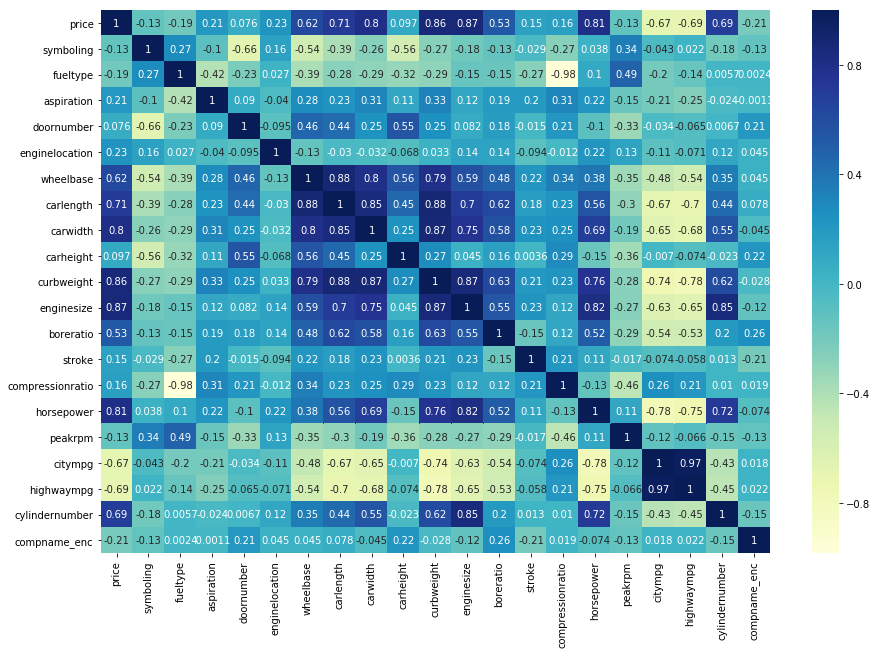

In [418]:
feature_list=['price','symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'cylindernumber', 'compname_enc']
plt.figure(figsize = (15, 10))
sns.heatmap(car_working_df_train[feature_list].corr(), annot=True, cmap="YlGnBu")
plt.show()

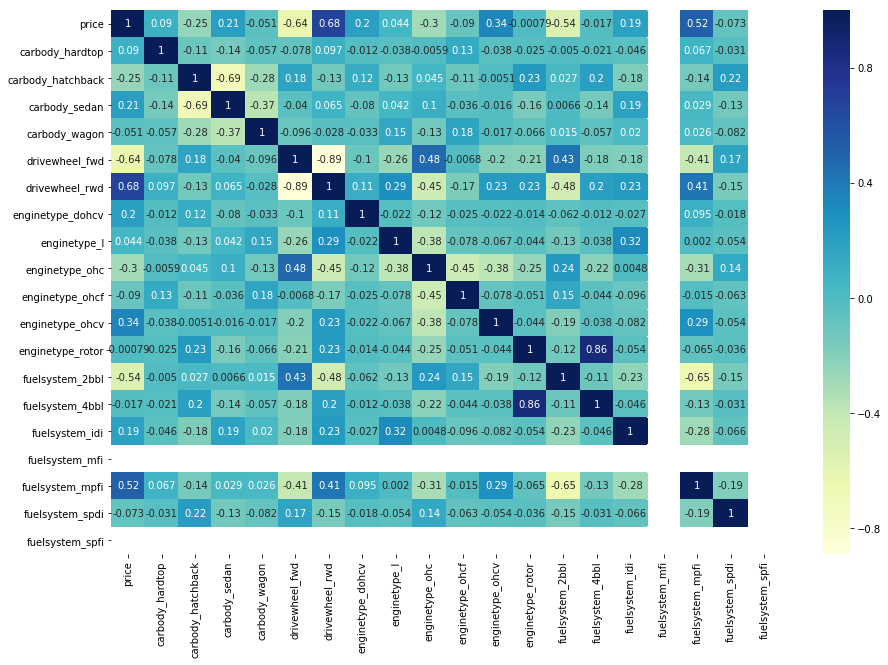

In [419]:
feature_list=['price','carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi']
plt.figure(figsize = (15, 10))
sns.heatmap(car_working_df_train[feature_list].corr(), annot=True, cmap="YlGnBu")
plt.show()

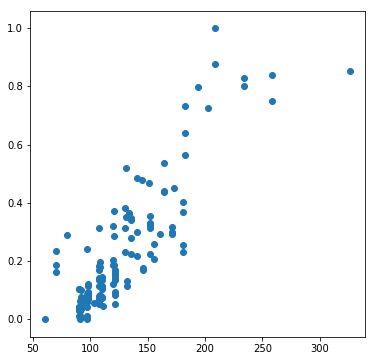

In [420]:
plt.figure(figsize=[6,6])
plt.scatter(car_working_df_train['enginesize'], car_working_df_train['price'])
plt.show()

### Step 5: Building a linear model

#### 1) Manually adding the features and building model

#### Dividing into X and Y sets for the model building

In [421]:
Y_train = car_working_df_train['price']
X_train = car_working_df_train

#### Adding first variable - enginesize - Model 1

In [422]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['enginesize']])

# Create a first fitted model
lr1 = sm.OLS(Y_train, X_train_lm).fit()

In [423]:
lr1.params

const        -0.351572
enginesize    0.004569
dtype: float64

In [424]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     430.5
Date:                Fri, 22 Feb 2019   Prob (F-statistic):           1.09e-44
Time:                        15:03:43   Log-Likelihood:                 117.01
No. Observations:                 143   AIC:                            -230.0
Df Residuals:                     141   BIC:                            -224.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3516      0.029    -12.146      0.0

#### Adding second variable - curbweight - Model 2

In [425]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['enginesize','curbweight']])

# Create a first fitted model
lr2 = sm.OLS(Y_train, X_train_lm).fit()

In [426]:
lr2.params

const        -0.544241
enginesize    0.002559
curbweight    0.000175
dtype: float64

In [427]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     284.0
Date:                Fri, 22 Feb 2019   Prob (F-statistic):           5.31e-50
Time:                        15:03:44   Log-Likelihood:                 132.84
No. Observations:                 143   AIC:                            -259.7
Df Residuals:                     140   BIC:                            -250.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5442      0.042    -13.023      0.0

In [428]:
# For each X, calculate VIF and save in dataframe
vif2 = pd.DataFrame()
vif2["VIF Factor"] = [variance_inflation_factor(X_train[['enginesize','curbweight']].values, i) for i in range(X_train[['enginesize','curbweight']].shape[1])]
vif2["features"] = ['enginesize','curbweight']
vif2

,VIF Factor,features
0,35.23635,enginesize
1,35.23635,curbweight


##### High VIF between 'enginesize' and 'curbweight', hence there is high collinearity.. Need to remove one

#### Adding third variable - horsepower - Model 3

In [429]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['enginesize','curbweight','horsepower']])

# Create a first fitted model
lr3 = sm.OLS(Y_train, X_train_lm).fit()

In [430]:
lr3.params

const        -0.527829
enginesize    0.001790
curbweight    0.000156
horsepower    0.001243
dtype: float64

In [431]:
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     209.7
Date:                Fri, 22 Feb 2019   Prob (F-statistic):           2.16e-51
Time:                        15:03:44   Log-Likelihood:                 139.18
No. Observations:                 143   AIC:                            -270.4
Df Residuals:                     139   BIC:                            -258.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5278      0.040    -13.071      0.0

In [432]:
# For each X, calculate VIF and save in dataframe
vif2 = pd.DataFrame()
vif2["VIF Factor"] = [variance_inflation_factor(X_train[['enginesize','curbweight','horsepower']].values, i) for i in range(X_train[['enginesize','curbweight','horsepower']].shape[1])]
vif2["features"] = ['enginesize','curbweight','horsepower']
vif2

,VIF Factor,features
0,50.339031,enginesize
1,36.040504,curbweight
2,23.777126,horsepower


#### Adding fourth variable - carwidth - Model 4

In [433]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['enginesize','curbweight','horsepower','carwidth']])

# Create a first fitted model
lr4 = sm.OLS(Y_train, X_train_lm).fit()

In [434]:
lr4.params

const        -1.512451
enginesize    0.001835
curbweight    0.000095
horsepower    0.001177
carwidth      0.017317
dtype: float64

In [435]:
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     164.3
Date:                Fri, 22 Feb 2019   Prob (F-statistic):           1.91e-51
Time:                        15:03:45   Log-Likelihood:                 142.17
No. Observations:                 143   AIC:                            -274.3
Df Residuals:                     138   BIC:                            -259.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5125      0.407     -3.714      0.0

#### Adding fifth variable - wheelbase - Model 5

In [436]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['enginesize','curbweight','horsepower','carwidth','wheelbase']])

# Create a first fitted model
lr5 = sm.OLS(Y_train, X_train_lm).fit()

In [437]:
lr5.params

const        -1.511908
enginesize    0.001838
curbweight    0.000092
horsepower    0.001209
carwidth      0.016775
wheelbase     0.000413
dtype: float64

In [438]:
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     130.5
Date:                Fri, 22 Feb 2019   Prob (F-statistic):           2.59e-50
Time:                        15:03:45   Log-Likelihood:                 142.18
No. Observations:                 143   AIC:                            -272.4
Df Residuals:                     137   BIC:                            -254.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5119      0.409     -3.699      0.0

##### wheelbase has high p-value (>0.05) so removing it
#### Adding fifth variable - boreratio - Model 5

In [439]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['enginesize','curbweight','horsepower','carwidth','boreratio']])

# Create a first fitted model
lr5 = sm.OLS(Y_train, X_train_lm).fit()

In [440]:
lr5.params

const        -1.460968
enginesize    0.001823
curbweight    0.000102
horsepower    0.001201
carwidth      0.017804
boreratio    -0.030919
dtype: float64

In [441]:
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     131.3
Date:                Fri, 22 Feb 2019   Prob (F-statistic):           1.88e-50
Time:                        15:03:45   Log-Likelihood:                 142.52
No. Observations:                 143   AIC:                            -273.0
Df Residuals:                     137   BIC:                            -255.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4610      0.413     -3.541      0.0

##### boreratio has high p-value (>0.05) so removing it
#### Adding fifth variable - enginelocation - Model 5

In [442]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['enginesize','curbweight','horsepower','carwidth','enginelocation']])

# Create a first fitted model
lr5 = sm.OLS(Y_train, X_train_lm).fit()

In [443]:
lr5.params

const            -1.762142
enginesize        0.001693
curbweight        0.000105
horsepower        0.000859
carwidth          0.021437
enginelocation    0.370513
dtype: float64

In [444]:
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     148.9
Date:                Fri, 22 Feb 2019   Prob (F-statistic):           1.39e-53
Time:                        15:03:45   Log-Likelihood:                 150.07
No. Observations:                 143   AIC:                            -288.1
Df Residuals:                     137   BIC:                            -270.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.7621      0.392     -4.

#### Adding sixth variable - aspiration  - Model 6

In [445]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['enginesize','curbweight','horsepower','carwidth','enginelocation','aspiration']])

# Create a first fitted model
lr6 = sm.OLS(Y_train, X_train_lm).fit()

In [446]:
lr6.params

const            -1.775788
enginesize        0.001611
curbweight        0.000111
horsepower        0.000885
carwidth          0.021562
enginelocation    0.370371
aspiration       -0.010492
dtype: float64

In [447]:
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     123.5
Date:                Fri, 22 Feb 2019   Prob (F-statistic):           1.59e-52
Time:                        15:03:46   Log-Likelihood:                 150.20
No. Observations:                 143   AIC:                            -286.4
Df Residuals:                     136   BIC:                            -265.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.7758      0.394     -4.

##### aspiration has high p-value - 0.627 (>0.05) - removing it
#### Adding sixth variable - stroke - Model 6

In [448]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['enginesize','curbweight','horsepower','carwidth','enginelocation','stroke']])

# Create a first fitted model
lr6 = sm.OLS(Y_train, X_train_lm).fit()

In [449]:
lr6.params

const            -1.732348
enginesize        0.001762
curbweight        0.000104
horsepower        0.000814
carwidth          0.022162
enginelocation    0.363047
stroke           -0.023761
dtype: float64

In [450]:
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     124.2
Date:                Fri, 22 Feb 2019   Prob (F-statistic):           1.12e-52
Time:                        15:03:46   Log-Likelihood:                 150.57
No. Observations:                 143   AIC:                            -287.1
Df Residuals:                     136   BIC:                            -266.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.7323      0.393     -4.

##### stroke has high p-value - 0.332 (>0.05) - removing it
#### Adding sixth variable - compressionratio  - Model 6

In [451]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['enginesize','curbweight','horsepower','carwidth','enginelocation','compressionratio']])

# Create a first fitted model
lr6 = sm.OLS(Y_train, X_train_lm).fit()

In [452]:
lr6.params

const              -1.697269
enginesize          0.001656
curbweight          0.000098
horsepower          0.001057
carwidth            0.020153
enginelocation      0.354181
compressionratio    0.002365
dtype: float64

In [453]:
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     124.3
Date:                Fri, 22 Feb 2019   Prob (F-statistic):           1.07e-52
Time:                        15:03:47   Log-Likelihood:                 150.62
No. Observations:                 143   AIC:                            -287.2
Df Residuals:                     136   BIC:                            -266.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.6973      0.397  

##### compressionratio  has high p-value - 0.310 (>0.05) - removing it
#### Adding sixth variable - carheight   - Model 6

In [454]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['enginesize','curbweight','horsepower','carwidth','enginelocation','carheight']])

# Create a first fitted model
lr6 = sm.OLS(Y_train, X_train_lm).fit()

In [455]:
lr6.params

const            -1.699213
enginesize        0.001664
curbweight        0.000113
horsepower        0.000782
carwidth          0.021665
enginelocation    0.376134
carheight        -0.001584
dtype: float64

In [456]:
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     123.4
Date:                Fri, 22 Feb 2019   Prob (F-statistic):           1.65e-52
Time:                        15:03:48   Log-Likelihood:                 150.16
No. Observations:                 143   AIC:                            -286.3
Df Residuals:                     136   BIC:                            -265.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.6992      0.422     -4.

##### carheight  has high p-value - 0.685 (>0.05) - removing it
#### Adding sixth variable - symboling    - Model 6

In [457]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['enginesize','curbweight','horsepower','carwidth','enginelocation','symboling']])

# Create a first fitted model
lr6 = sm.OLS(Y_train, X_train_lm).fit()

In [458]:
lr6.params

const            -1.818063
enginesize        0.001742
curbweight        0.000112
horsepower        0.000722
carwidth          0.022079
enginelocation    0.365084
symboling         0.007037
dtype: float64

In [459]:
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     124.3
Date:                Fri, 22 Feb 2019   Prob (F-statistic):           1.08e-52
Time:                        15:03:48   Log-Likelihood:                 150.61
No. Observations:                 143   AIC:                            -287.2
Df Residuals:                     136   BIC:                            -266.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.8181      0.396     -4.

##### symboling has high p-value - 0.311 (>0.05) - removing it
#### Adding remaining variables - peakrpm, fueltype,citympg, highwaympg,cylindernumber  - Model 6

In [460]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['enginesize','curbweight','horsepower','carwidth','enginelocation','peakrpm', 'fueltype','citympg', 'highwaympg','cylindernumber' ]])

# Create a first fitted model
lr6 = sm.OLS(Y_train, X_train_lm).fit()

In [461]:
lr6.params

const            -1.615531
enginesize        0.001906
curbweight        0.000112
horsepower        0.000670
carwidth          0.018685
enginelocation    0.345025
peakrpm           0.089472
fueltype         -0.041244
citympg           0.000448
highwaympg       -0.000332
cylindernumber    0.002558
dtype: float64

In [462]:
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     74.18
Date:                Fri, 22 Feb 2019   Prob (F-statistic):           3.22e-49
Time:                        15:03:49   Log-Likelihood:                 152.08
No. Observations:                 143   AIC:                            -282.2
Df Residuals:                     132   BIC:                            -249.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.6155      0.448     -3.

#### peakrpm, fueltype, citympg,highwaympg,cylindernumber has high p-values (>0.05) - removing them

In [463]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['enginesize','curbweight','horsepower','carwidth','enginelocation']])

# Create a first fitted model
lr6 = sm.OLS(Y_train, X_train_lm).fit()

In [464]:
lr6.params

const            -1.762142
enginesize        0.001693
curbweight        0.000105
horsepower        0.000859
carwidth          0.021437
enginelocation    0.370513
dtype: float64

In [465]:
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     148.9
Date:                Fri, 22 Feb 2019   Prob (F-statistic):           1.39e-53
Time:                        15:03:49   Log-Likelihood:                 150.07
No. Observations:                 143   AIC:                            -288.1
Df Residuals:                     137   BIC:                            -270.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.7621      0.392     -4.

In [466]:
# For each X, calculate VIF and save in dataframe
vif6 = pd.DataFrame()
vif6["VIF Factor"] = [variance_inflation_factor(X_train[['enginesize','curbweight','horsepower','carwidth','enginelocation']].values, i) for i in range(X_train[['enginesize','curbweight','horsepower','carwidth','enginelocation']].shape[1])]
vif6["features"] = ['enginesize','curbweight','horsepower','carwidth','enginelocation']
vif6

,VIF Factor,features
0,54.915811,enginesize
1,111.401746,curbweight
2,25.294476,horsepower
3,36.320308,carwidth
4,1.115469,enginelocation


### 2) Using Recursive Feature elimination

In [467]:
X_train.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,compname_enc
122,1,1,0,1,0,93.7,167.3,63.8,50.8,2191,4,98,2.97,3.23,9.4,68,0.551020,31,38,0.068818,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,16
125,3,1,0,0,0,94.5,168.9,68.3,50.2,2778,4,151,3.94,3.11,9.5,143,0.551020,19,27,0.466890,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,18
166,1,1,0,0,0,94.5,168.7,64.0,52.6,2300,4,98,3.24,3.08,9.4,112,1.000000,26,29,0.122110,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,22
1,3,1,0,0,0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,0.346939,21,27,0.314446,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
199,-1,1,1,1,0,104.3,188.8,67.2,57.5,3157,4,130,3.62,3.15,7.5,162,0.387755,17,22,0.382131,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,26


In [468]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, Y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, Y_train)

In [469]:
list(zip(X_train,rfe.support_,rfe.ranking_))

[('symboling', False, 23),
 ('fueltype', True, 1),
 ('aspiration', False, 13),
 ('doornumber', False, 9),
 ('enginelocation', True, 1),
 ('wheelbase', False, 20),
 ('carlength', False, 21),
 ('carwidth', False, 16),
 ('carheight', False, 14),
 ('curbweight', False, 24),
 ('cylindernumber', False, 7),
 ('enginesize', False, 22),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', False, 15),
 ('peakrpm', False, 10),
 ('citympg', False, 3),
 ('highwaympg', False, 8),
 ('price', True, 1),
 ('carbody_hardtop', False, 11),
 ('carbody_hatchback', False, 12),
 ('carbody_sedan', False, 2),
 ('carbody_wagon', False, 5),
 ('drivewheel_fwd', True, 1),
 ('drivewheel_rwd', False, 17),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', True, 1),
 ('enginetype_ohc', True, 1),
 ('enginetype_ohcf', True, 1),
 ('enginetype_ohcv', False, 4),
 ('enginetype_rotor', True, 1),
 ('fuelsystem_2bbl', False, 18),
 ('fuelsystem_4bbl', True, 1),
 ('fuelsystem_idi', True, 1

In [470]:
rfe.support_

array([False,  True, False, False,  True, False, False, False, False,
       False, False, False,  True,  True,  True, False, False, False,
       False,  True, False, False, False, False,  True, False,  True,
        True,  True,  True, False,  True, False,  True,  True, False,
       False,  True, False, False])

In [471]:
sel_col_list = X_train.columns[rfe.support_]

In [472]:
X_train_rfe = X_train[sel_col_list]
X_train_rfe = X_train_rfe.drop(columns='price')

In [473]:
X_train_rfe.head()

,fueltype,enginelocation,boreratio,stroke,compressionratio,drivewheel_fwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_rotor,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_spdi
122,1,0,2.97,3.23,9.4,1,0,0,1,0,0,0,0,0
125,1,0,3.94,3.11,9.5,0,0,0,1,0,0,0,0,0
166,1,0,3.24,3.08,9.4,0,0,0,0,0,0,0,0,0
1,1,0,3.47,2.68,9.0,0,0,0,0,0,0,0,0,0
199,1,0,3.62,3.15,7.5,0,0,0,1,0,0,0,0,0


#### RFE - Model 1

In [474]:
X_train_rfe = sm.add_constant(X_train_rfe)
lr_rfe_1 = sm.OLS(Y_train,X_train_rfe).fit()   # Running the linear model

In [475]:
lr_rfe_1.params

const              -0.010349
fueltype           -0.319162
enginelocation      0.576282
boreratio           0.293468
stroke              0.053975
compressionratio   -0.042084
drivewheel_fwd     -0.162111
enginetype_dohcv    0.152320
enginetype_l       -0.294720
enginetype_ohc     -0.126902
enginetype_ohcf    -0.302387
enginetype_rotor   -0.137013
fuelsystem_4bbl    -0.096693
fuelsystem_idi      0.308812
fuelsystem_spdi    -0.077254
dtype: float64

In [476]:
print(lr_rfe_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     18.32
Date:                Fri, 22 Feb 2019   Prob (F-statistic):           1.97e-23
Time:                        15:03:52   Log-Likelihood:                 91.741
No. Observations:                 143   AIC:                            -155.5
Df Residuals:                     129   BIC:                            -114.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0103      0.340  

#### RFE - Model 2

In [477]:
X_train_rfe.columns

Index(['const', 'fueltype', 'enginelocation', 'boreratio', 'stroke',
       'compressionratio', 'drivewheel_fwd', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_rotor',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_spdi'],
      dtype='object')

#### Adding the features received from "Manual Model building" step

In [478]:
feature_list = ['fueltype', 'doornumber', 'wheelbase', 'carheight',
       'cylindernumber', 'stroke', 'peakrpm', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'fuelsystem_spdi', 
       'enginesize','curbweight','horsepower','carwidth','enginelocation']
X_train_rfe = X_train[feature_list]

In [479]:
X_train_rfe.head()

,fueltype,doornumber,wheelbase,carheight,cylindernumber,stroke,peakrpm,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,fuelsystem_spdi,enginesize,curbweight,horsepower,carwidth,enginelocation
122,1,1,93.7,50.8,4,3.23,0.551020,1,0,0,1,0,0,0,98,2191,68,63.8,0
125,1,0,94.5,50.2,4,3.11,0.551020,0,1,0,1,0,0,0,151,2778,143,68.3,0
166,1,0,94.5,52.6,4,3.08,1.000000,0,1,0,0,0,0,0,98,2300,112,64.0,0
1,1,0,88.6,48.8,4,2.68,0.346939,0,1,0,0,0,0,0,130,2548,111,64.1,0
199,1,1,104.3,57.5,4,3.15,0.387755,0,1,0,1,0,0,0,130,3157,162,67.2,0


In [480]:
X_train_rfe = sm.add_constant(X_train_rfe)
lr_rfe_2 = sm.OLS(Y_train,X_train_rfe).fit()   # Running the linear model

In [481]:
lr_rfe_2.params

const              -1.325725
fueltype           -0.052038
doornumber         -0.009833
wheelbase          -0.000605
carheight          -0.001812
cylindernumber     -0.004555
stroke             -0.091926
peakrpm             0.092899
drivewheel_fwd     -0.017628
drivewheel_rwd      0.047378
enginetype_dohcv   -0.069562
enginetype_ohc      0.080522
enginetype_ohcf    -0.005264
enginetype_ohcv    -0.060227
fuelsystem_spdi    -0.056209
enginesize          0.002398
curbweight          0.000088
horsepower          0.000887
carwidth            0.020730
enginelocation      0.269510
dtype: float64

In [482]:
print(lr_rfe_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     50.08
Date:                Fri, 22 Feb 2019   Prob (F-statistic):           1.17e-48
Time:                        15:03:53   Log-Likelihood:                 171.93
No. Observations:                 143   AIC:                            -303.9
Df Residuals:                     123   BIC:                            -244.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.3257      0.487  

In [483]:
vif_rfe = pd.DataFrame()
vif_rfe["VIF Factor"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif_rfe["features"] = X_train_rfe.columns
vif_rfe

,VIF Factor,features
0,5518.304670,const
1,2.079309,fueltype
2,1.794298,doornumber
3,8.585807,wheelbase
4,2.939011,carheight
5,9.242392,cylindernumber
6,3.234343,stroke
7,2.375853,peakrpm
8,8.148534,drivewheel_fwd
9,9.775016,drivewheel_rwd


In [484]:
#X_train_rfe = X_train_rfe.drop(columns=['curbweight','horsepower'])
X_train_rfe = X_train_rfe.drop(columns=['enginetype_ohcf','enginetype_dohcv','drivewheel_rwd','drivewheel_fwd'  ])

#### Dropping columns enginetype_ohcf','enginetype_dohcv','drivewheel_rwd','drivewheel_fwd' due to high p-value - Model 3

In [485]:
X_train_rfe = sm.add_constant(X_train_rfe)
lr_rfe_3 = sm.OLS(Y_train,X_train_rfe).fit()   # Running the linear model

In [486]:
lr_rfe_3.params

const             -0.862218
fueltype          -0.064912
doornumber        -0.023100
wheelbase          0.002372
carheight         -0.005456
cylindernumber    -0.013808
stroke            -0.110266
peakrpm            0.098823
enginetype_ohc     0.086018
enginetype_ohcv   -0.047484
fuelsystem_spdi   -0.088884
enginesize         0.002437
curbweight         0.000144
horsepower         0.001005
carwidth           0.011592
enginelocation     0.294973
dtype: float64

In [487]:
print(lr_rfe_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     61.53
Date:                Fri, 22 Feb 2019   Prob (F-statistic):           9.91e-51
Time:                        15:03:55   Log-Likelihood:                 167.98
No. Observations:                 143   AIC:                            -304.0
Df Residuals:                     127   BIC:                            -256.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.8622      0.449     

#### Dropping column 'wheelbase' due to high p-value - Model 4

In [488]:
X_train_rfe = X_train_rfe.drop(columns=['wheelbase'])

In [489]:
X_train_rfe = sm.add_constant(X_train_rfe)
lr_rfe_4 = sm.OLS(Y_train,X_train_rfe).fit()  

In [490]:
lr_rfe_4.params

const             -0.927236
fueltype          -0.063861
doornumber        -0.021490
carheight         -0.004030
cylindernumber    -0.013264
stroke            -0.108269
peakrpm            0.104475
enginetype_ohc     0.082617
enginetype_ohcv   -0.056706
fuelsystem_spdi   -0.086549
enginesize         0.002501
curbweight         0.000157
horsepower         0.000859
carwidth           0.014440
enginelocation     0.282871
dtype: float64

In [491]:
print(lr_rfe_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     66.05
Date:                Fri, 22 Feb 2019   Prob (F-statistic):           1.65e-51
Time:                        15:03:55   Log-Likelihood:                 167.61
No. Observations:                 143   AIC:                            -305.2
Df Residuals:                     128   BIC:                            -260.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.9272      0.441     

In [492]:
vif_rfe = pd.DataFrame()
vif_rfe["VIF Factor"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif_rfe["features"] = X_train_rfe.columns
vif_rfe

,VIF Factor,features
0,4432.506113,const
1,1.904299,fueltype
2,1.612378,doornumber
3,2.207824,carheight
4,7.509644,cylindernumber
5,2.136990,stroke
6,2.215508,peakrpm
7,2.304814,enginetype_ohc
8,1.906516,enginetype_ohcv
9,1.249046,fuelsystem_spdi


#### Dropping columns 'carheight','doornumber','engine_ohcv' due to high p-value - Model 5

In [494]:
X_train_rfe = X_train_rfe.drop(columns=['doornumber','carheight','enginetype_ohcv'])

In [495]:
X_train_rfe = sm.add_constant(X_train_rfe)
lr_rfe_5 = sm.OLS(Y_train,X_train_rfe).fit() 

In [496]:
lr_rfe_5.params

const             -0.994688
fueltype          -0.075253
cylindernumber    -0.026436
stroke            -0.109470
peakrpm            0.112295
enginetype_ohc     0.088108
fuelsystem_spdi   -0.078607
enginesize         0.002828
curbweight         0.000116
horsepower         0.001279
carwidth           0.013246
enginelocation     0.270955
dtype: float64

In [497]:
print(lr_rfe_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     81.99
Date:                Fri, 22 Feb 2019   Prob (F-statistic):           3.42e-53
Time:                        15:13:01   Log-Likelihood:                 164.59
No. Observations:                 143   AIC:                            -305.2
Df Residuals:                     131   BIC:                            -269.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.9947      0.400     

In [498]:
vif_rfe = pd.DataFrame()
vif_rfe["VIF Factor"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif_rfe["features"] = X_train_rfe.columns
vif_rfe

,VIF Factor,features
0,3574.972875,const
1,1.856377,fueltype
2,6.296191,cylindernumber
3,2.127977,stroke
4,2.111495,peakrpm
5,1.965983,enginetype_ohc
6,1.190335,fuelsystem_spdi
7,17.290901,enginesize
8,10.369314,curbweight
9,6.856951,horsepower


#### Dropping column 'cylindernumber' due to high VIF - Model 6

In [499]:
X_train_rfe = X_train_rfe.drop(columns='cylindernumber')

In [500]:
X_train_rfe = sm.add_constant(X_train_rfe)
lr_rfe_6 = sm.OLS(Y_train,X_train_rfe).fit() 

In [501]:
lr_rfe_6.params

const             -1.134444
fueltype          -0.068067
stroke            -0.083672
peakrpm            0.102052
enginetype_ohc     0.078454
fuelsystem_spdi   -0.071180
enginesize         0.001880
curbweight         0.000144
horsepower         0.001141
carwidth           0.013321
enginelocation     0.308182
dtype: float64

In [502]:
print(lr_rfe_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     88.32
Date:                Fri, 22 Feb 2019   Prob (F-statistic):           1.78e-53
Time:                        15:13:30   Log-Likelihood:                 162.81
No. Observations:                 143   AIC:                            -303.6
Df Residuals:                     132   BIC:                            -271.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.1344      0.396     

In [503]:
vif_rfe = pd.DataFrame()
vif_rfe["VIF Factor"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif_rfe["features"] = X_train_rfe.columns
vif_rfe

,VIF Factor,features
0,3442.864663,const
1,1.827510,fueltype
2,1.691346,stroke
3,2.084299,peakrpm
4,1.830016,enginetype_ohc
5,1.175335,fuelsystem_spdi
6,7.162851,enginesize
7,8.828200,curbweight
8,6.656944,horsepower
9,4.804717,carwidth


#### Dropping column 'curbweight' due to high VIF - Model 7

In [504]:
X_train_rfe = X_train_rfe.drop(columns='curbweight')

In [505]:
X_train_rfe = sm.add_constant(X_train_rfe)
lr_rfe_7 = sm.OLS(Y_train,X_train_rfe).fit() 

In [506]:
lr_rfe_7.params

const             -1.860677
fueltype          -0.091520
stroke            -0.076157
peakrpm            0.073793
enginetype_ohc     0.058381
fuelsystem_spdi   -0.066164
enginesize         0.002531
horsepower         0.001445
carwidth           0.028517
enginelocation     0.275268
dtype: float64

In [508]:
print(lr_rfe_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     87.19
Date:                Fri, 22 Feb 2019   Prob (F-statistic):           2.22e-51
Time:                        15:14:02   Log-Likelihood:                 155.05
No. Observations:                 143   AIC:                            -290.1
Df Residuals:                     133   BIC:                            -260.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.8607      0.367     

In [526]:
vif_rfe = pd.DataFrame()
vif_rfe["VIF Factor"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif_rfe["features"] = X_train_rfe.columns
vif_rfe

,VIF Factor,features
0,4074.811680,const
1,1.752216,fueltype
2,1.599827,stroke
3,1.781030,enginetype_ohc
4,1.188123,fuelsystem_spdi
5,4.208751,enginesize
6,5.306982,horsepower
7,3.975524,carwidth
8,1.174243,enginelocation
9,3.140305,highwaympg


#### Adding column 'highwaympg' - Model 8

In [527]:
X_train_rfe['highwaympg'] = X_train[['highwaympg']]

In [528]:
X_train_rfe.head()

,const,fueltype,stroke,enginetype_ohc,fuelsystem_spdi,enginesize,horsepower,carwidth,enginelocation,highwaympg
122,1.0,1,3.23,1,0,98,68,63.8,0,38
125,1.0,1,3.11,1,0,151,143,68.3,0,27
166,1.0,1,3.08,0,0,98,112,64.0,0,29
1,1.0,1,2.68,0,0,130,111,64.1,0,27
199,1.0,1,3.15,1,0,130,162,67.2,0,22


In [529]:
X_train_rfe = sm.add_constant(X_train_rfe)
lr_rfe_8 = sm.OLS(Y_train,X_train_rfe).fit() 

In [530]:
print(lr_rfe_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     91.05
Date:                Fri, 22 Feb 2019   Prob (F-statistic):           1.92e-52
Time:                        15:24:45   Log-Likelihood:                 157.71
No. Observations:                 143   AIC:                            -295.4
Df Residuals:                     133   BIC:                            -265.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.1852      0.445     

In [531]:
vif_rfe = pd.DataFrame()
vif_rfe["VIF Factor"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif_rfe["features"] = X_train_rfe.columns
vif_rfe

,VIF Factor,features
0,4074.811680,const
1,1.752216,fueltype
2,1.599827,stroke
3,1.781030,enginetype_ohc
4,1.188123,fuelsystem_spdi
5,4.208751,enginesize
6,5.306982,horsepower
7,3.975524,carwidth
8,1.174243,enginelocation
9,3.140305,highwaympg


### Step 7: Residual Analysis of the train data

In [537]:
Y_train_price = lr_rfe_8.predict(X_train_rfe)

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'Errors')

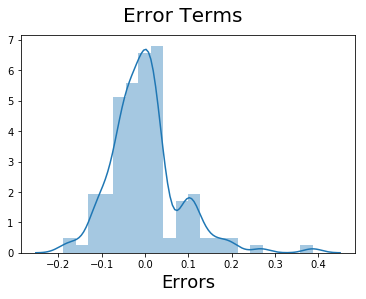

In [538]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((Y_train - Y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)        

### Step 8: Making Predictions Using the Final Model

#### Applying the scaling on the test sets

In [539]:
feature_scale_list = ['price','peakrpm']
car_working_df_test[feature_scale_list] =  scaler.fit_transform(car_working_df_test[feature_scale_list])
car_working_df_test.head()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,compname_enc
160,0,1,0,1,0,95.7,166.3,64.4,53.0,2094,4,98,3.19,3.03,9.0,70,0.265306,38,47,0.058474,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,22
186,2,1,0,1,0,97.3,171.7,65.5,55.7,2275,4,109,3.19,3.40,9.0,85,0.448980,27,34,0.077398,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,25
59,1,1,0,0,0,98.8,177.8,66.5,53.7,2385,4,122,3.39,3.39,8.6,84,0.265306,26,32,0.086148,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,11
165,1,1,0,0,0,94.5,168.7,64.0,52.6,2265,4,98,3.24,3.08,9.4,112,1.000000,26,29,0.097473,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,22
140,2,1,0,0,0,93.3,157.3,63.8,55.7,2240,4,108,3.62,2.64,8.7,73,0.102041,26,31,0.055099,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,21


#### Dividing into X_test and y_test

In [540]:
Y_test = car_working_df_test.pop('price')
X_test = car_working_df_test

In [542]:
X_test_lr_rfe_8 = X_test[['fueltype','stroke','enginetype_ohc','fuelsystem_spdi','enginesize','horsepower','carwidth','enginelocation','highwaympg']]
X_test_lr_rfe_8 = sm.add_constant(X_test_lr_rfe_8)

In [543]:
Y_pred_lr_rfe_8 = lr_rfe_8.predict(X_test_lr_rfe_8)

### Step 9: Model Evaluation

Text(0,0.5,'y_pred')

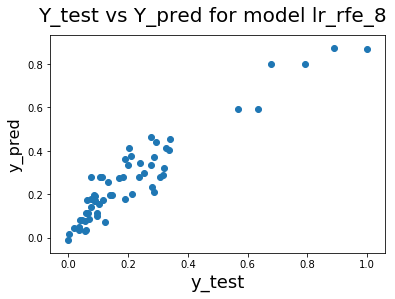

In [545]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(Y_test, Y_pred_lr_rfe_8)
fig.suptitle('Y_test vs Y_pred for model lr_rfe_8', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

### Conclusion
We can see that the equation of our best fitted line is:

$ price = -1.1852 -0.1048  \times  fueltype  - 0.0686 \times  stroke + 0.0714 \times enginetype_ohc - 0.0870 \times fuelsystem_spdi + 0.0022 \times enginesize + 0.0015 \times horsepower + 0.0212 \times carwidth + 0.2942 \times enginelocation -0.0047 \times highwaympg  $


#### Final model - lr_rfe_8
##### Predictors: 
<ul>
<li>fueltype</li>
<li>stroke</li>
<li>enginetype_ohc</li>
<li>fuelsystem_spdi</li>
<li>enginesize</li>
<li>horsepower</li>
<li>carwidth</li>
<li>enginelocation</li> 
<li>highwaympg</li>
</ul>